In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Matplotlib is building the font cache; this may take a moment.


In [11]:
df = pd.read_csv( "retail_sales_dataset.csv",encoding="unicode_escape")
 
    


In [13]:
df.shape

(1000, 9)

In [18]:
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [19]:
pd.isnull(df)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False


In [21]:
pd.isnull(df).sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [23]:
df.columns

Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')

In [24]:
df[['Age','Quantity','Price per Unit','Total Amount']].describe()

,Age,Quantity,Price per Unit,Total Amount
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,41.39200,2.514000,179.890000,456.000000
std,13.68143,1.132734,189.681356,559.997632
min,18.00000,1.000000,25.000000,25.000000
25%,29.00000,1.000000,30.000000,60.000000
50%,42.00000,3.000000,50.000000,135.000000
75%,53.00000,4.000000,300.000000,900.000000
max,64.00000,4.000000,500.000000,2000.000000


Data is already clean and donot contains null values

EDA

#Gender

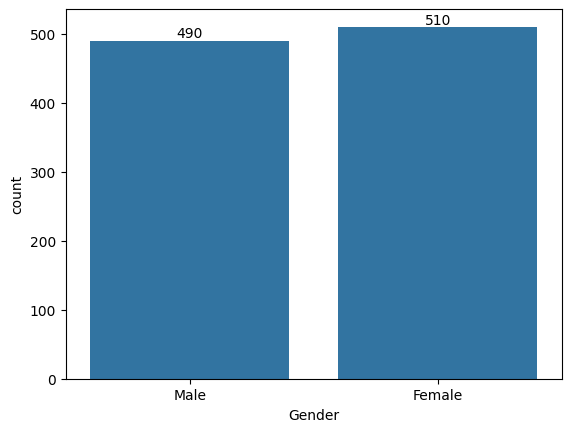

In [34]:
ax=sns.countplot(x='Gender',data=df)
for bars in ax.containers:
    ax.bar_label(bars)

In [30]:
df.groupby(['Gender'],as_index=False)['Total Amount'].sum().sort_values(by='Total Amount',ascending=False)

,Gender,Total Amount
0,Female,232840
1,Male,223160


<Axes: xlabel='Gender', ylabel='Total Amount'>

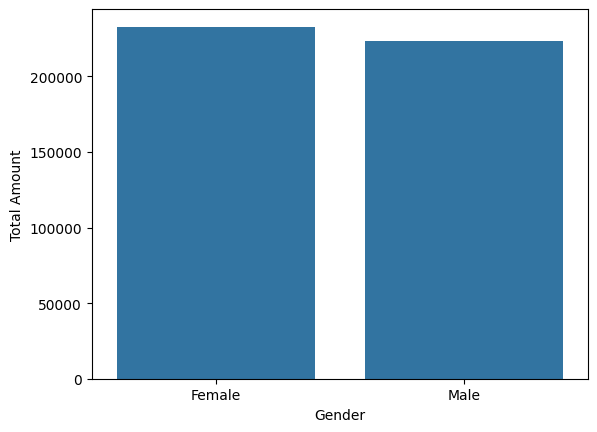

In [33]:
sales_gen=df.groupby(['Gender'],as_index=False)['Total Amount'].sum().sort_values(by='Total Amount',ascending=False)
sns.barplot(x='Gender',y='Total Amount',data=sales_gen)

Most of the Females are Buyers

Age

C:\Users\Dell\AppData\Local\Temp\ipykernel_10572\2116434624.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Age', 'Gender'])


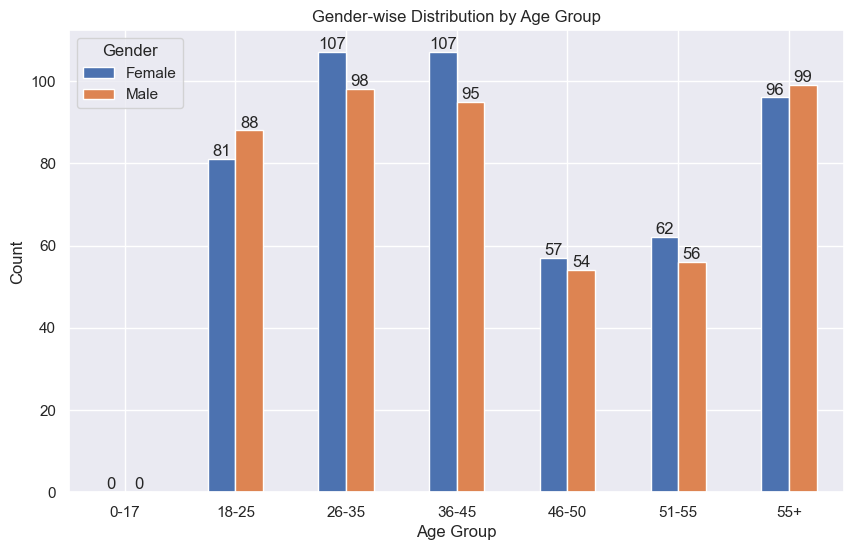

In [42]:
bins = [0, 17, 25, 35, 45, 50, 55, 100]
labels = ['0-17', '18-25', '26-35', '36-45', '46-50', '51-55', '55+']

df['Age'] = pd.cut(df['Age'], bins=bins, labels=labels)
age_gender_count = (
    df.groupby(['Age', 'Gender'])
      .size()
      .unstack()
      .fillna(0)
)
ax = age_gender_count.plot(kind='bar', figsize=(10,6))

plt.title('Gender-wise Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Gender')

for container in ax.containers:
    ax.bar_label(container)

plt.show()

C:\Users\Dell\AppData\Local\Temp\ipykernel_10572\4002839625.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sales_gen=df.groupby(['Age'],as_index=False)['Total Amount'].sum().sort_values(by='Total Amount',ascending=False)


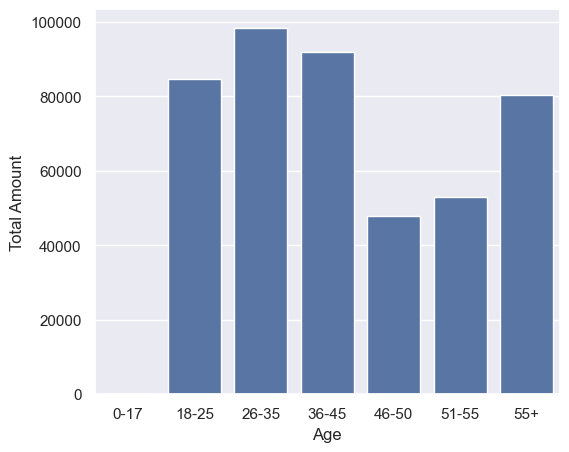

In [48]:
sales_gen=df.groupby(['Age'],as_index=False)['Total Amount'].sum().sort_values(by='Total Amount',ascending=False)
sns.barplot(x='Age',y='Total Amount',data=sales_gen)
for bars in ax.containers:
    ax.bar_label(bars)

most of buyers are Womens between 26-35

Product Category

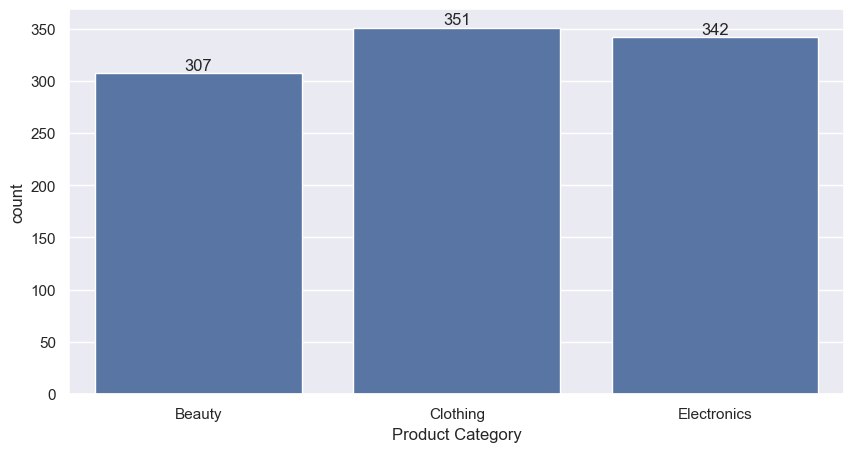

In [47]:
ax=sns.countplot(x='Product Category',data=df)
sns.set(rc={'figure.figsize':(6,5)})
for bars in ax.containers:
    ax.bar_label(bars)
    

<Axes: xlabel='Product Category', ylabel='Total Amount'>

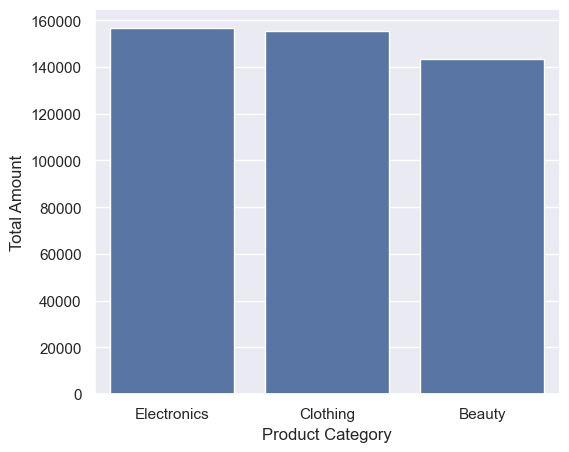

In [51]:
sales_gen=df.groupby(['Product Category'],as_index=False)['Total Amount'].sum().sort_values(by='Total Amount',ascending=False)
sns.barplot(x='Product Category',y='Total Amount',data=sales_gen)


Most selling Products are Electronics and Clothing Product

Quantity

<Axes: xlabel='Product Category', ylabel='Quantity'>

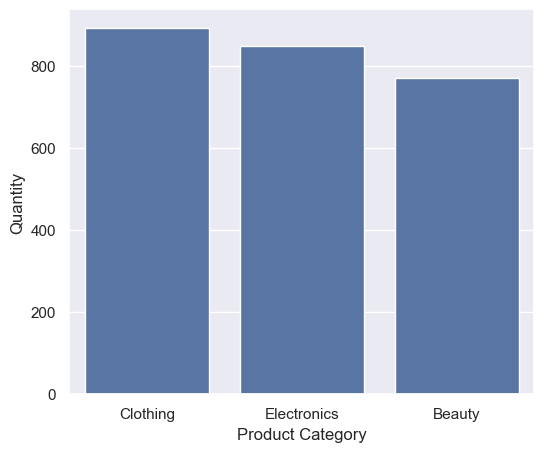

In [54]:
sales_gen=df.groupby(['Product Category'],as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False)
sns.barplot(x='Product Category',y='Quantity',data=sales_gen)


Price per Unit


<Axes: xlabel='Product Category', ylabel='Price per Unit'>

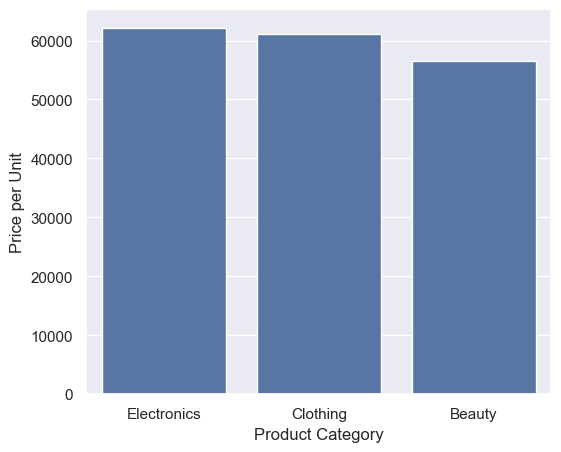

In [56]:
sales_gen=df.groupby(['Product Category'],as_index=False)['Price per Unit'].sum().sort_values(by='Price per Unit',ascending=False)
sns.barplot(x='Product Category',y='Price per Unit',data=sales_gen)

Conclusion : 
         From the analysis, it is observed that females are the dominant buyers compared to males. The highest number of purchases is made by women in the age group of 26–35 years, indicating that this segment is the most active and valuable customer group.

Additionally, Electronics and Clothing are the top-selling product categories, not only in terms of quantity sold but also in price per unit, contributing significantly to overall revenue. This suggests that customers are willing to spend more on these categories.

Overall, the business performance is strongly driven by women aged 26–35 purchasing high-value Electronics and Clothing products, making this segment crucial for future marketing and sales strategies.